In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DL/adult.csv")

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.shape

(48842, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Feature target split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

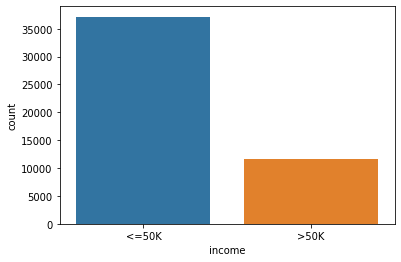

In [ ]:
sns.countplot(y)

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
# split categorical and numerical data

df_num = X.select_dtypes("int64")
df_cat = X.select_dtypes("object")

In [ ]:
df_num.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [ ]:
for col in df_num:
  ss = StandardScaler()
  df_num[col] = ss.fit_transform(df_num[[col]])

In [ ]:
df_num.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104


In [ ]:
df_cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States


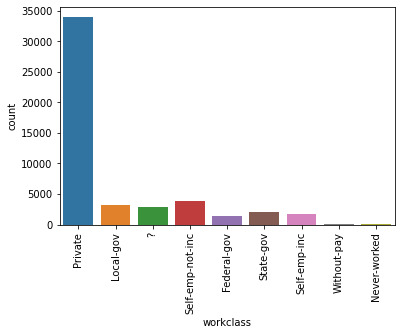

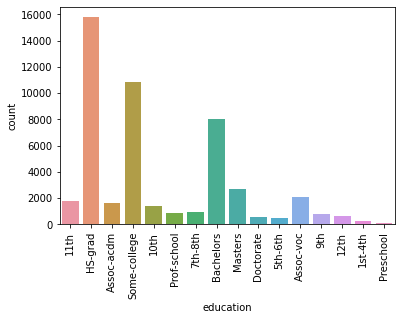

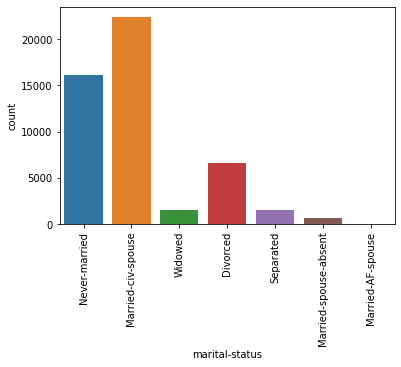

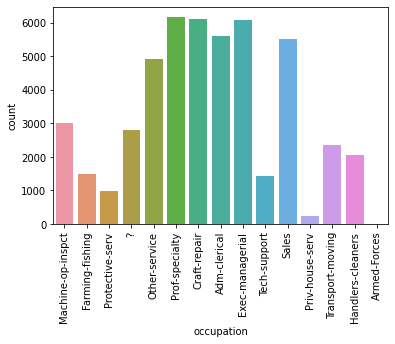

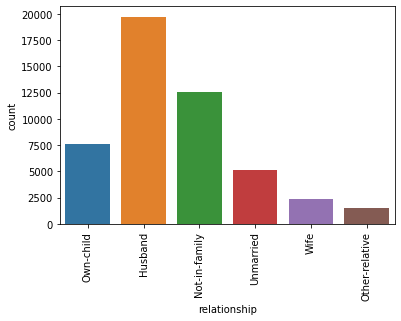

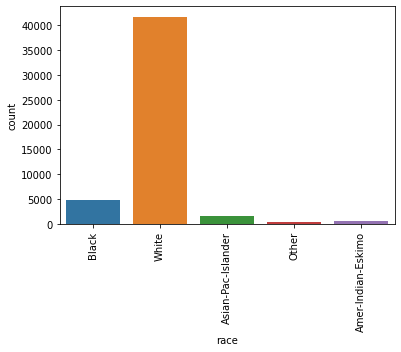

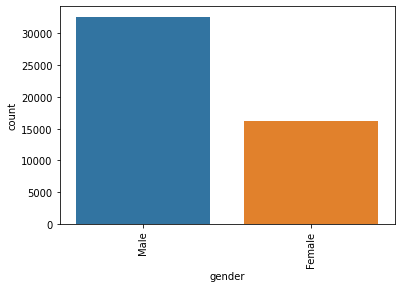

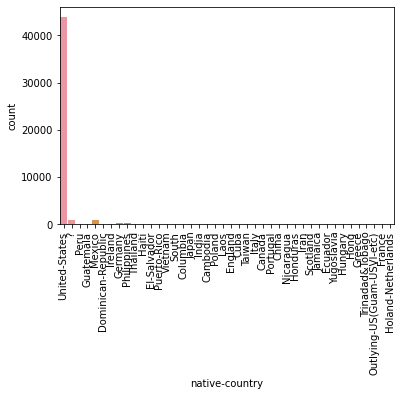

In [ ]:
for col in df_cat:
  plt.figure()
  sns.countplot(data=df_cat, x=col)
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
df_cat.drop("native-country",axis=1, inplace=True)

In [ ]:
df_cat["workclass"].replace("?", "unknown", inplace=True)

In [ ]:
df_cat["occupation"].replace("?", "unknown", inplace=True)

In [ ]:
df_cat = pd.get_dummies(df_cat)

In [ ]:
df_cat.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_unknown,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_unknown,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0


In [ ]:
X = pd.concat([df_num, df_cat], axis=1)

In [ ]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_unknown,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_unknown,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [ ]:
X_train.shape

(34189, 66)

In [ ]:
# neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [ ]:
model = Sequential()
model.add(Dense(16, activation="tanh", input_dim=66))
model.add(BatchNormalization())
model.add(Dense(16, activation="tanh"))
model.add(BatchNormalization())
model.add(Dense(8, activation="tanh"))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor="loss", min_delta=0.01, patience=5)

In [ ]:
model.fit(X_train,y_train, batch_size=64, epochs=20, callbacks=[early_stopping])

Epoch 1/20
535/535 [==============================] - 3s 3ms/step - loss: 0.4101
Epoch 2/20
535/535 [==============================] - 1s 2ms/step - loss: 0.3267
Epoch 3/20
535/535 [==============================] - 1s 2ms/step - loss: 0.3203
Epoch 4/20
535/535 [==============================] - 1s 2ms/step - loss: 0.3166
Epoch 5/20
535/535 [==============================] - 1s 2ms/step - loss: 0.3164
Epoch 6/20
535/535 [==============================] - 1s 2ms/step - loss: 0.3143
Epoch 7/20
535/535 [==============================] - 1s 2ms/step - loss: 0.3141
Epoch 8/20
535/535 [==============================] - 1s 2ms/step - loss: 0.3114
Epoch 9/20
535/535 [==============================] - 1s 2ms/step - loss: 0.3116


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11112
           1       0.76      0.60      0.67      3541

    accuracy                           0.86     14653
   macro avg       0.82      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653

